<a href="https://colab.research.google.com/github/reneto-unstoppable/flood-prediction/blob/main/flood_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

==== Dataset Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  


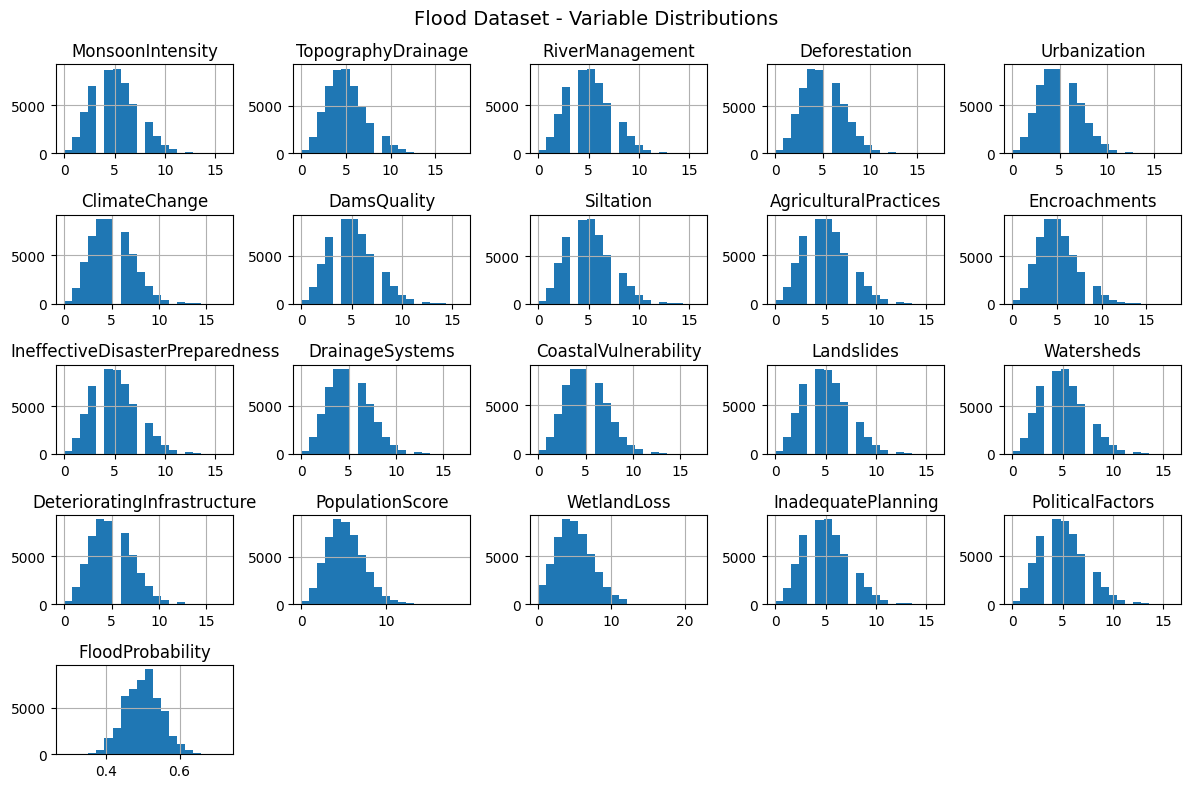

In [6]:
# Week 1 - Data Loading & Exploration

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# Make sure flood.csv is in the same folder
df = pd.read_csv("flood.csv")

# 1. Dataset info
print("==== Dataset Info ====")
df.info()

# 2. Summary statistics
print("\n==== Summary Statistics ====")
print(df.describe())

# 3. Check missing values
print("\n==== Missing Values ====")
print(df.isnull().sum())

# 4. Column names
print("\n==== Column Names ====")
print(df.columns.tolist())

# 5. First 5 rows
print("\n==== First Five Rows ====")
print(df.head())

# 6. Simple visualization: histogram
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Flood Dataset - Variable Distributions", fontsize=14)
plt.tight_layout()
plt.show()

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving flood.csv to flood (1).csv
User uploaded file "flood (1).csv" with length 2354496 bytes
